Read Dataset
--

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['gender'] = encoder.fit_transform(df['gender'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])

In [ ]:
df = df.dropna()
df.reset_index()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Split dataset into train and test set
--


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( df[df.columns[:-1]],  df['stroke'], test_size=0.2)

Decision Tree
--

Criterion=entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
classifier.feature_importances_

array([0.19510273, 0.02799547, 0.2458508 , 0.03479551, 0.01714358,
       0.00966233, 0.0235244 , 0.01896674, 0.16778729, 0.22576059,
       0.03341055])

In [ ]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix

Predicted,0,1
Actual,,
0,899,43
1,37,3


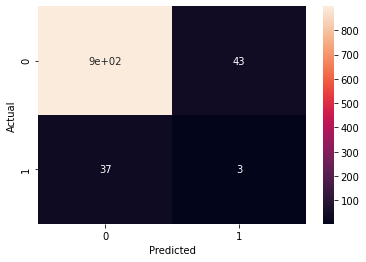

In [ ]:
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
accuracy_score(Y_test, y_pred)

0.9185336048879837

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

metrics.confusion_matrix(Y_test, y_pred)

array([[899,  43],
       [ 37,   3]])

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       942
           1       0.07      0.07      0.07        40

    accuracy                           0.92       982
   macro avg       0.51      0.51      0.51       982
weighted avg       0.92      0.92      0.92       982



In [ ]:
import graphviz

dot_data = export_graphviz(classifier, 
                           feature_names=['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_types', 'avg_glucose_level', 'bmi', 'smoking_status'],
                           class_names="stroke",
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("stroke_dataset")

'stroke_dataset.pdf'

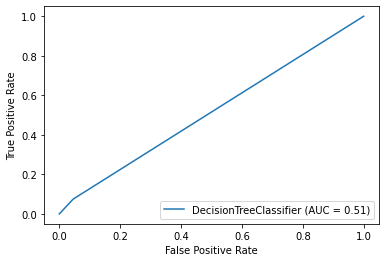

In [ ]:
plot_roc_curve(classifier, X_test, Y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(classifier, X_test, Y_test, cv=5, scoring='accuracy')

scores

array([0.91370558, 0.89847716, 0.89795918, 0.92857143, 0.93367347])

In [ ]:
scores.mean()

0.9144773645498809

In [ ]:
scores.std()

0.01480935958612242

In [ ]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(classifier, X_test, Y_test, cv=5, scoring=scoring)
scores

{'fit_time': array([0.00660849, 0.00414467, 0.004287  , 0.00396967, 0.00420785]),
 'score_time': array([0.00256968, 0.0023284 , 0.00227737, 0.00215316, 0.00218415]),
 'test_precision_macro': array([0.58626374, 0.5165886 , 0.51648352, 0.47894737, 0.55291005]),
 'test_recall_macro': array([0.65575397, 0.52810847, 0.52792553, 0.48404255, 0.54654255])}

Criterion=Gini

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=0)

model.fit(X_train, Y_train)

y_predicted = model.predict(X_test)

accuracy_score(Y_test, y_predicted)

0.9164969450101833

Prunning
--


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

[0.         0.0001637  0.00016462 0.00016518 0.00016607 0.00016698
 0.00016807 0.00016808 0.00016871 0.00016965 0.00019588 0.00020079
 0.00020372 0.00021781 0.00021827 0.00021827 0.00022282 0.00022282
 0.00022635 0.00022918 0.00022918 0.00022983 0.0002315  0.0002315
 0.00023262 0.00023343 0.00023742 0.00023873 0.0002405  0.00024124
 0.00024124 0.000243   0.00024383 0.00024404 0.00024643 0.00024739
 0.00025034 0.00025465 0.00025828 0.00027221 0.00031124 0.00032211
 0.00033069 0.00033953 0.00033953 0.00033953 0.00033953 0.0003457
 0.0003466  0.00034893 0.00036217 0.00036378 0.00038129 0.00038197
 0.00038197 0.00038197 0.00039153 0.00040743 0.00040744 0.00040878
 0.00042129 0.00043654 0.00043794 0.00044018 0.00045837 0.00046721
 0.00047624 0.00049111 0.00050257 0.00050929 0.00052618 0.00054325
 0.00055559 0.00057949 0.00069245 0.00082004 0.00091861 0.00095755
 0.00476669] [0.         0.00049111 0.00098497 0.0014805  0.00197872 0.00247967
 0.00298387 0.00348812 0.00450041 0.00500937 0.0059

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for training set')

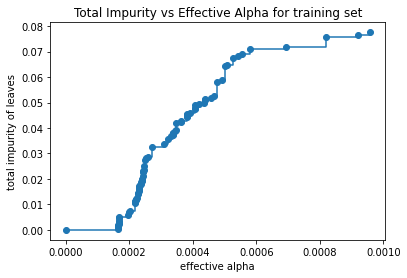

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")


In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, Y_train)
  clfs.append(clf)

Text(0, 0.5, 'total depth')

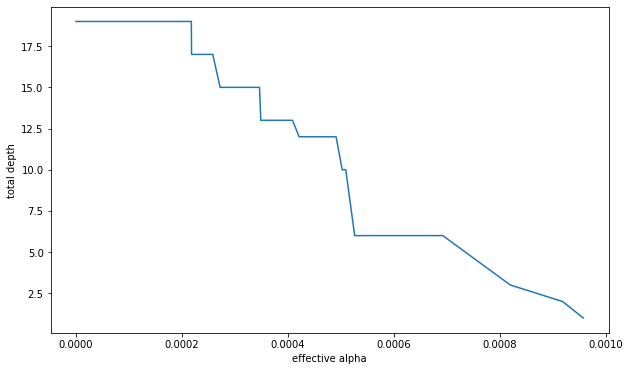

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

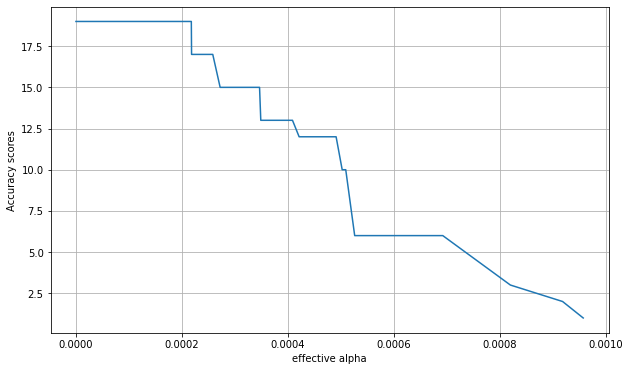

In [ ]:
acc_scores = [accuracy_score(Y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

Random Forest
--

Without scaling the data
--

In [ ]:
randomForest = RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)
randomForest.fit(X_train, Y_train)
y_pred = randomForest.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
accuracy_score(Y_test, y_pred)

0.9582484725050916

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



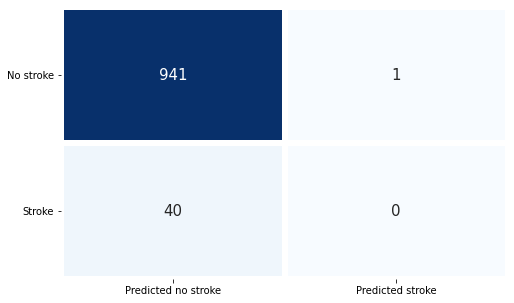

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(Y_test, y_pred), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

Scaling the data, Dropping the id column and using smote technique
--

In [ ]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

numerical = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
categorical = X.select_dtypes(include = ['object']).columns.to_list()

for i in categorical:
  le = LabelEncoder()
  X[i] = le.fit_transform(X[i])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical] = scaler.fit_transform(X[numerical])

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.070138,-0.318067,4.381968,1,2,1,2.777698,0.981345,1
2,1,1.646563,-0.318067,4.381968,1,2,0,0.013842,0.459269,2
3,0,0.272012,-0.318067,-0.228208,1,2,1,1.484132,0.701207,3
4,0,1.602222,3.143994,-0.228208,1,3,0,1.549193,-0.623083,2
5,1,1.690903,-0.318067,-0.228208,1,2,1,1.821368,0.013595,1


In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# because there is an imbalance between the number of samples for patients that haven't had a stroke and those who have had a stroke, I decided to use smote
# which is a technique that generates the virtual training records by linear interpolation for the minority class
# in this case the minority class is patients who have had a stroke
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = RandomForestClassifier(criterion='entropy', random_state=0, max_depth=10)
model.fit(X_train_balanced, Y_train_balanced)
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8727087576374746

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       939
           1       0.11      0.28      0.16        43

    accuracy                           0.87       982
   macro avg       0.54      0.59      0.55       982
weighted avg       0.93      0.87      0.90       982



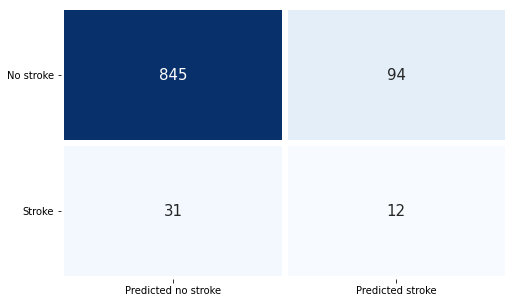

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()